In [1]:
import pandas as pd

In [2]:
# CSV 파일 경로
csv_file = '../data/data_adl_fall_time2.csv'

# CSV 파일을 DataFrame으로 읽어오기
df = pd.read_csv(csv_file)

# DataFrame 확인
print(df.head())

   UserCode    Label  GyroX  GyroY     GyroZ  Temperature  Heartbeat   
0         8  Walking   5.41  13.21 -4.630918         36.8         94  \
1         8  Walking   6.74   8.16  0.953424         36.9         93   
2         8  Walking   5.33   5.37 -2.792171         36.9         91   
3         8  Walking   3.38   8.54 -1.525479         36.8         93   
4         8  Walking   1.73   9.11 -0.994285         36.7         93   

         Lat         Lng  No     time  
0  35.235809  129.077699   1  0:00:00  
1  35.235969  129.077695   2  0:00:02  
2  35.235999  129.077640   3  0:00:04  
3  35.235998  129.077793   4  0:00:06  
4  35.235855  129.077650   5  0:00:08  


In [3]:
# 결측치 확인
df.isnull().sum()

UserCode       0
Label          0
GyroX          0
GyroY          0
GyroZ          0
Temperature    0
Heartbeat      0
Lat            0
Lng            0
No             0
time           0
dtype: int64

In [4]:
# 값이 0인 결측치 찾기
df.eq(0).sum()

UserCode          0
Label             0
GyroX          6601
GyroY          5881
GyroZ          6699
Temperature       0
Heartbeat         0
Lat               0
Lng               0
No                0
time              0
dtype: int64

In [5]:
# 결측치가 삭제된 DataFrame 생성
df_cleaned = df[~(df.eq(0).sum(axis=1) > 0)]

# 결과 확인
print(df_cleaned)

        UserCode       Label  GyroX  GyroY     GyroZ  Temperature  Heartbeat   
0              8     Walking   5.41  13.21 -4.630918         36.8         94  \
1              8     Walking   6.74   8.16  0.953424         36.9         93   
2              8     Walking   5.33   5.37 -2.792171         36.9         91   
3              8     Walking   3.38   8.54 -1.525479         36.8         93   
4              8     Walking   1.73   9.11 -0.994285         36.7         93   
...          ...         ...    ...    ...       ...          ...        ...   
293734         1  Downstairs  -3.87   7.55  3.300000         36.2         95   
293735         1  Downstairs  -4.06   8.08  4.790000         36.1         91   
293736         1  Downstairs  -6.32   8.66  4.940000         36.3         95   
293737         1  Downstairs  -5.37  11.22  3.060000         36.3         95   
293738         1  Downstairs  -5.79   9.92  2.530000         36.2         92   

              Lat         Lng      No  

In [6]:
# 값이 0인 요소 찾기
df_cleaned.eq(0).sum()

UserCode       0
Label          0
GyroX          0
GyroY          0
GyroZ          0
Temperature    0
Heartbeat      0
Lat            0
Lng            0
No             0
time           0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 데이터로 분할
X = df[['Temperature','Heartbeat','GyroX','GyroY','GyroZ']]
y = df['Label']

# 테스트 세트와 트레인 세트로 분할 (70% 트레인, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# 결과 확인
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)
print("X_test:")
print(X_test)
print("y_test:")
print(y_test)

X_train:
        Temperature  Heartbeat  GyroX  GyroY      GyroZ
120888         36.7         92   3.06  12.87  -1.307553
37140          36.6         94  -3.45  18.73  14.246883
192694         36.5         93   0.19  12.60  -2.450000
95065          36.5         94   2.72   5.52  -0.108963
176782         36.8         92  -4.56   3.41   8.200000
...             ...        ...    ...    ...        ...
235075         36.6         92   1.33   7.44  -3.830000
10742          36.8         94  -4.90  17.31   3.445948
49689          36.6         91  -1.65  16.78  10.337844
189636         36.5         91 -10.08   1.31  -0.760000
61615          36.6         95  -3.15   9.43   0.000000

[205617 rows x 5 columns]
y_train:
120888       Walking
37140        Walking
192694       Jogging
95065     Downstairs
176782          Fall
             ...    
235075       Walking
10742        Jogging
49689        Walking
189636       Walking
61615       Upstairs
Name: Label, Length: 205617, dtype: object
X_test:
 

In [11]:
import joblib
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../model/scaler0526.pkl')

['../model/scaler0526.pkl']

In [12]:
# 독립변수, 종속변수 설정
X = X_train
y = y_train
print("독립변수 X : ", X)
print("종속변수 Y : ", y)

독립변수 X :  [[ 0.76486452 -0.3347864   0.438187    0.85580158 -0.52294738]
 [ 0.29724276  1.00013273 -0.57262187  1.76846344  2.55490949]
 [-0.170379    0.33267317 -0.00743842  0.81375061 -0.74901067]
 ...
 [ 0.29724276 -1.00224596 -0.29313555  1.46476197  1.78140268]
 [-0.170379   -1.00224596 -1.60206316 -0.94460305 -0.41459945]
 [ 0.29724276  1.6675923  -0.52604082  0.32004103 -0.26421334]]
종속변수 Y :  120888       Walking
37140        Walking
192694       Jogging
95065     Downstairs
176782          Fall
             ...    
235075       Walking
10742        Jogging
49689        Walking
189636       Walking
61615       Upstairs
Name: Label, Length: 205617, dtype: object


독립변수 : 체온, 맥박, 자이로스코프 x,y,z축
종속변수 : 활동 레이블

선형 모델을 기반으로 한 모델 생성

In [13]:
from matplotlib import pyplot as plt
from sklearn import metrics

kernal_evals = dict() # 모델 평가 결과를 저장할 딕셔너리

# 모델을 평가, 결과를 출력, kernal_evals 딕셔너리에 저장
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall,
                               test_recall]
    print(f"Training Accuracy {name} is {train_accuracy * 100},  Test Accuracy {name} is {test_accuracy * 100}")
    print(f"Training Precesion {name} is {train_precision * 100},  Test Accuracy {name} is {test_precision * 100}")
    print(f"Training Recall {name} is {train_recall * 100},  Test Accuracy {name} is {test_recall * 100}")

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=['LAYING', 'FALL', 'STANDING', 'WALKING',
                                                                'DOWNSTAIRS', 'UPSTAIRS'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression is 47.18919155517297,  Test Accuracy Logistic Regression is 47.06543201470688
Training Precesion Logistic Regression is 47.18919155517297,  Test Accuracy Logistic Regression is 47.06543201470688
Training Recall Logistic Regression is 47.18919155517297,  Test Accuracy Logistic Regression is 47.06543201470688


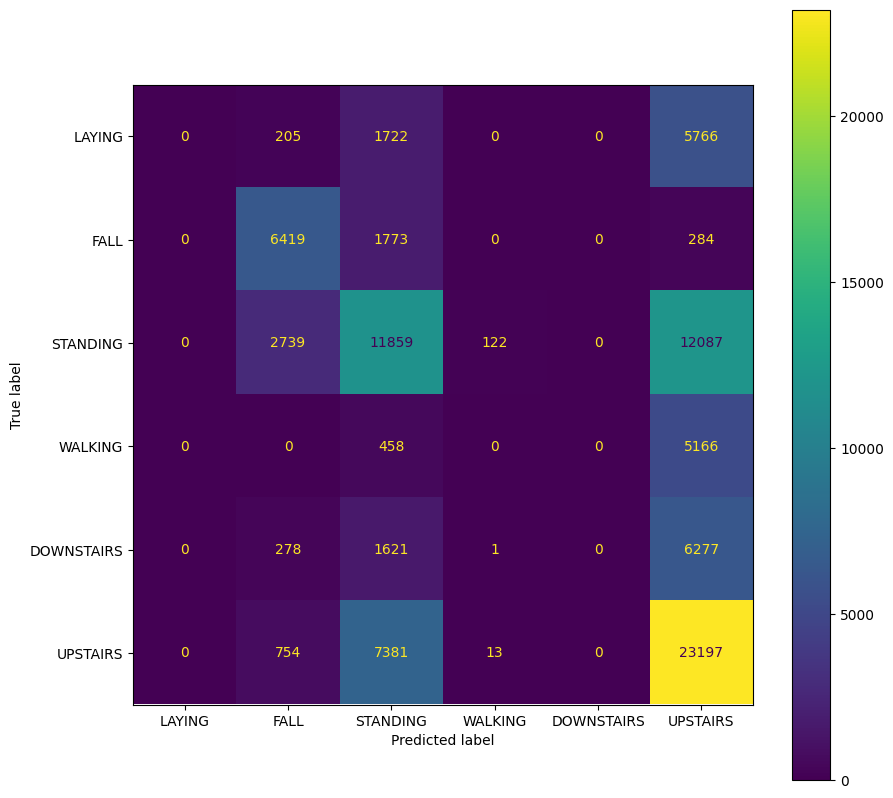

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

Training Accuracy LinearDiscriminantAnalysis is 46.86139764708171,  Test Accuracy LinearDiscriminantAnalysis is 46.80556501214226
Training Precesion LinearDiscriminantAnalysis is 46.86139764708171,  Test Accuracy LinearDiscriminantAnalysis is 46.80556501214226
Training Recall LinearDiscriminantAnalysis is 46.86139764708171,  Test Accuracy LinearDiscriminantAnalysis is 46.80556501214226


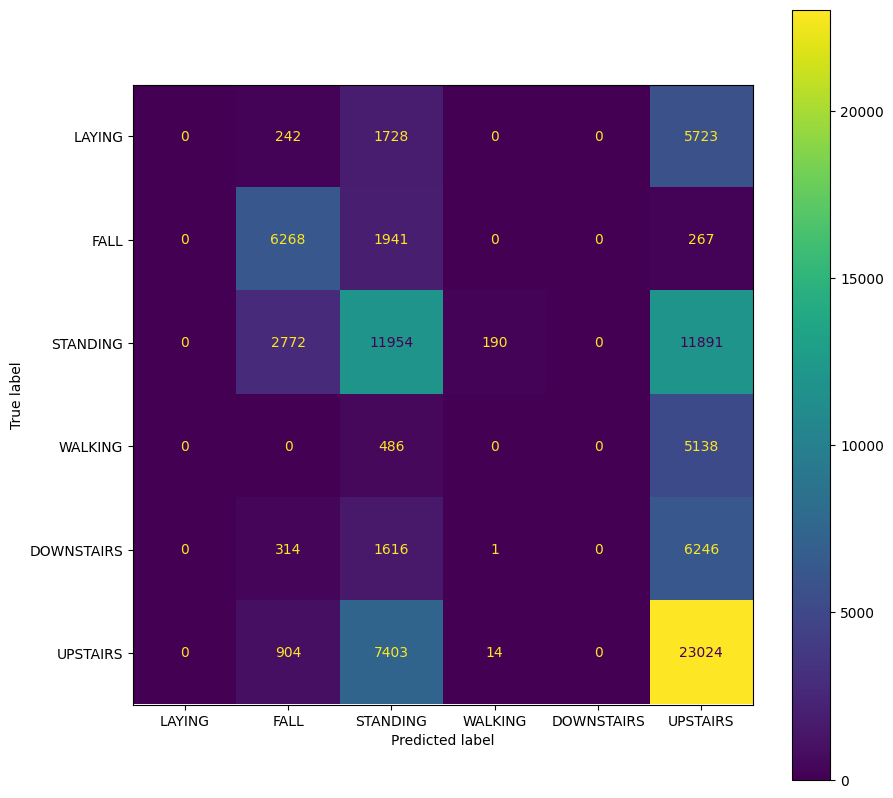

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", X_train, X_test, y_train, y_test)

In [16]:
import pandas as pd

# 판다스 Series로 변환
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Training Accuracy KNeighborsClassifier is 72.40743712825302,  Test Accuracy KNeighborsClassifier is 70.7428337985974
Training Precesion KNeighborsClassifier is 72.40743712825302,  Test Accuracy KNeighborsClassifier is 70.7428337985974
Training Recall KNeighborsClassifier is 72.40743712825302,  Test Accuracy KNeighborsClassifier is 70.7428337985974


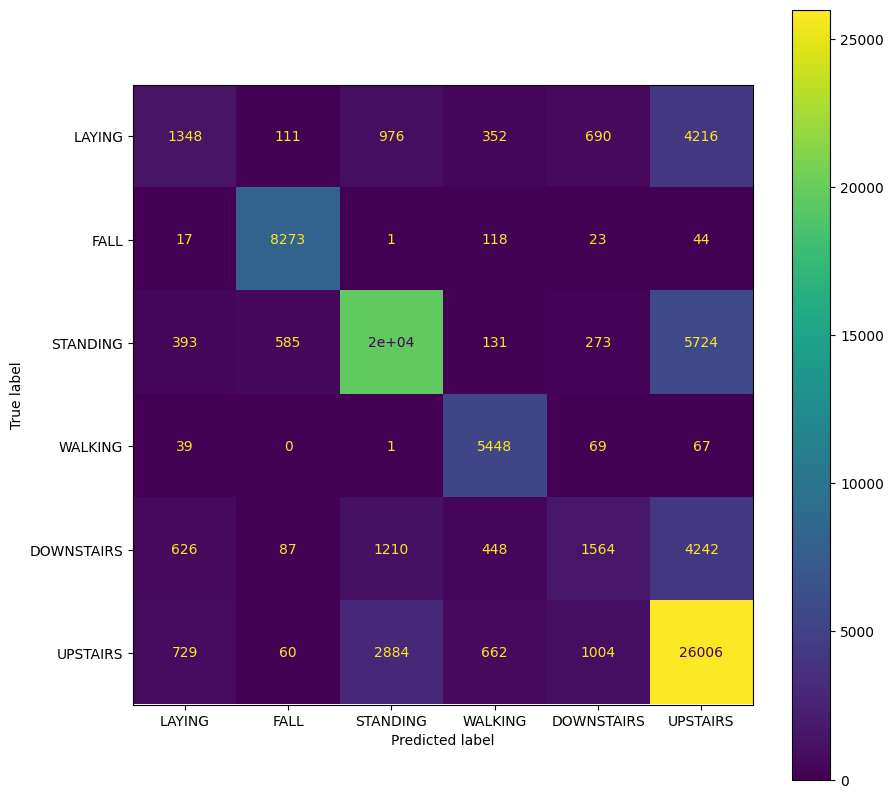

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

Training Accuracy GaussianNB is 59.933760340827845,  Test Accuracy GaussianNB is 59.801184721182
Training Precesion GaussianNB is 59.933760340827845,  Test Accuracy GaussianNB is 59.801184721182
Training Recall GaussianNB is 59.933760340827845,  Test Accuracy GaussianNB is 59.801184721182


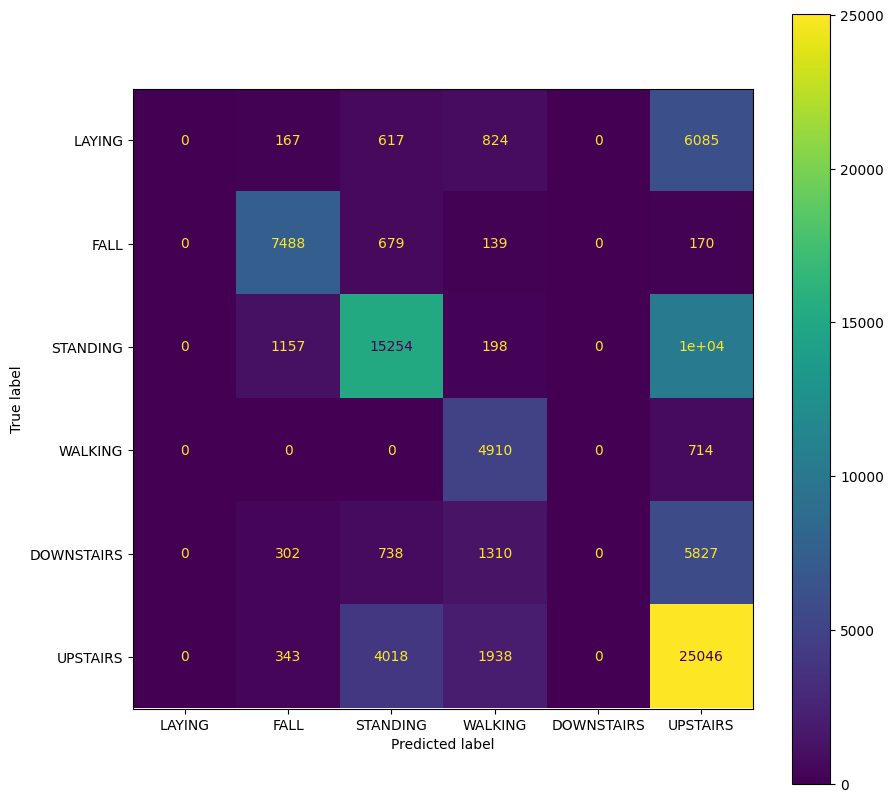

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

Training Accuracy Linear SVC(LBasedImpl) is 47.77328722819611,  Test Accuracy Linear SVC(LBasedImpl) is 47.630557636004625
Training Precesion Linear SVC(LBasedImpl) is 47.77328722819611,  Test Accuracy Linear SVC(LBasedImpl) is 47.630557636004625
Training Recall Linear SVC(LBasedImpl) is 47.77328722819611,  Test Accuracy Linear SVC(LBasedImpl) is 47.630557636004625


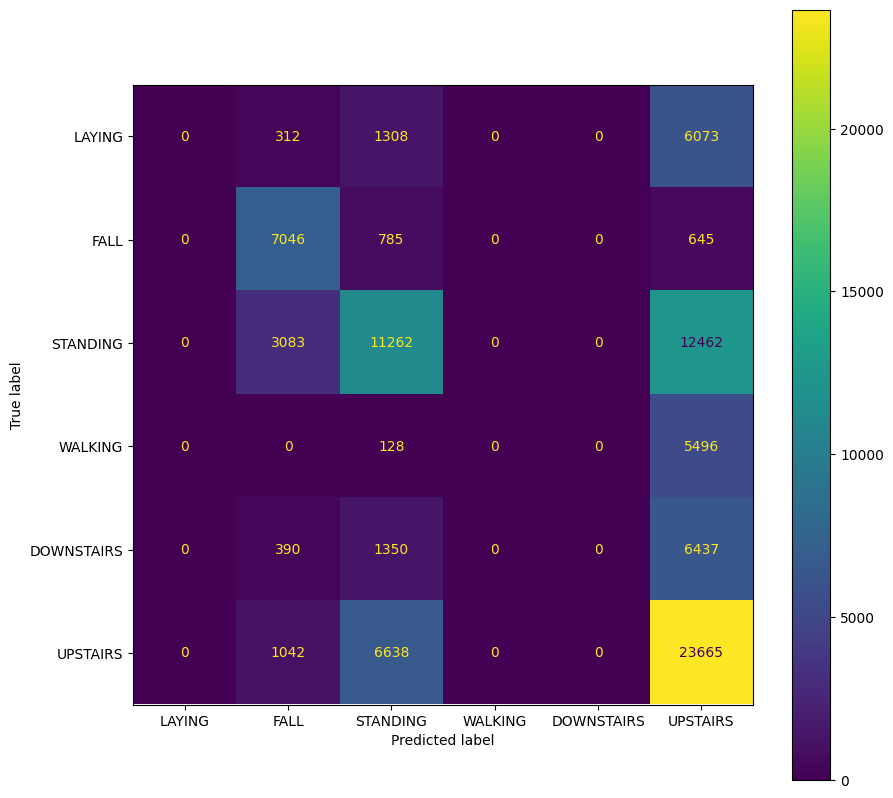

In [19]:
from sklearn import svm

lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

Training Accuracy RBF SVC is 68.60473598972847,  Test Accuracy RBF SVC is 68.50502712149066
Training Precesion RBF SVC is 68.60473598972847,  Test Accuracy RBF SVC is 68.50502712149066
Training Recall RBF SVC is 68.60473598972847,  Test Accuracy RBF SVC is 68.50502712149066


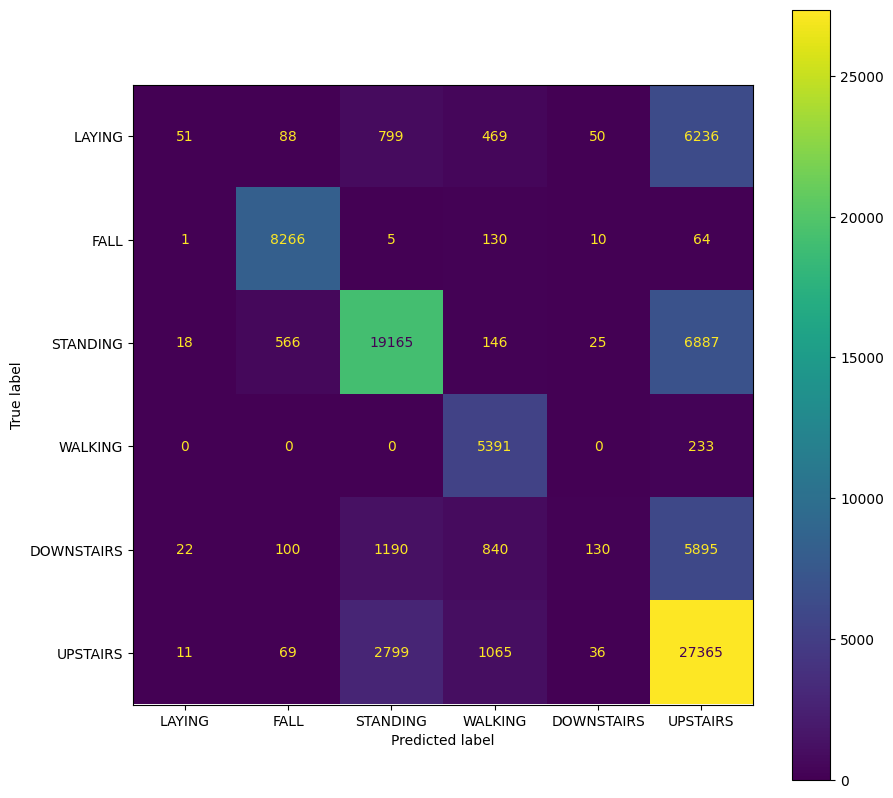

In [20]:
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
evaluate_classification(rbf, "RBF SVC", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier is 99.90564982467403,  Test Accuracy DecisionTreeClassifier is 65.42747554526679
Training Precesion DecisionTreeClassifier is 99.90564982467403,  Test Accuracy DecisionTreeClassifier is 65.42747554526679
Training Recall DecisionTreeClassifier is 99.90564982467403,  Test Accuracy DecisionTreeClassifier is 65.42747554526679


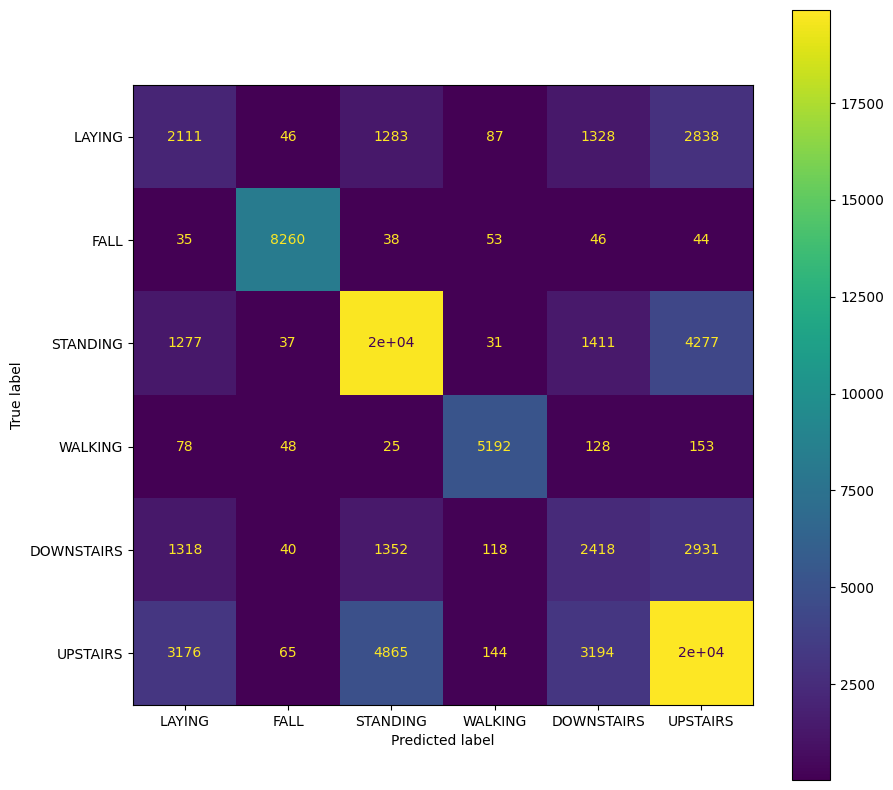

In [21]:
from sklearn.tree import DecisionTreeClassifier

tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

Training Accuracy XGBClassifier is 74.38684544565868,  Test Accuracy XGBClassifier is 72.83765688477338
Training Precesion XGBClassifier is 74.38684544565868,  Test Accuracy XGBClassifier is 72.83765688477338
Training Recall XGBClassifier is 74.38684544565868,  Test Accuracy XGBClassifier is 72.83765688477338


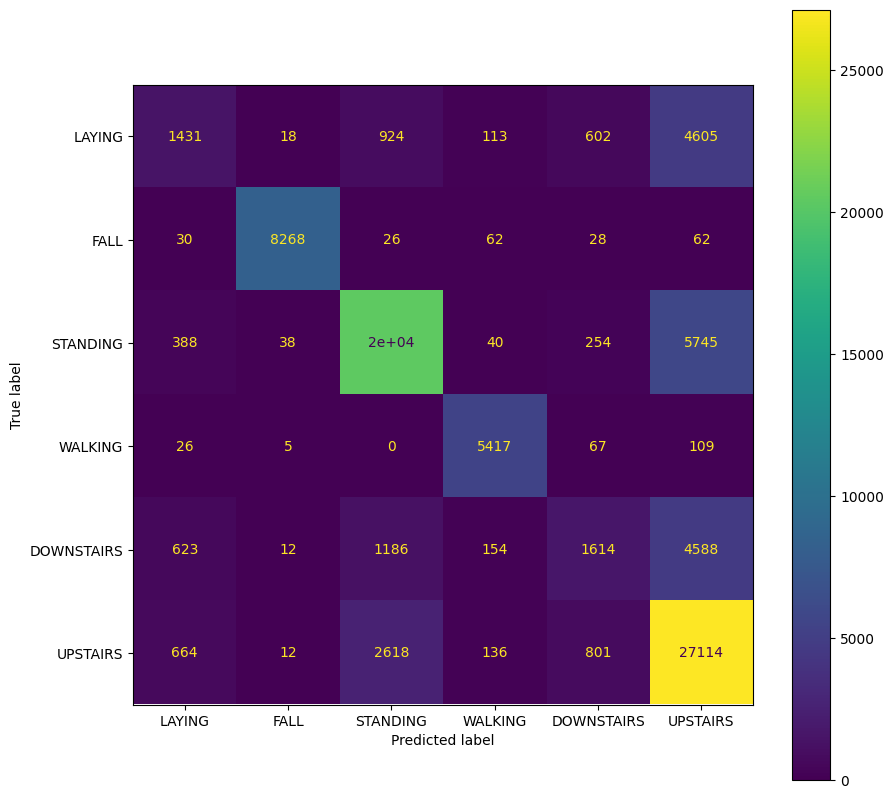

In [22]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb = XGBClassifier().fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)

Training Accuracy XGBClassifier is 71.76984393313782,  Test Accuracy XGBClassifier is 71.37377726333946
Training Precesion XGBClassifier is 71.76984393313782,  Test Accuracy XGBClassifier is 71.37377726333946
Training Recall XGBClassifier is 71.76984393313782,  Test Accuracy XGBClassifier is 71.37377726333946


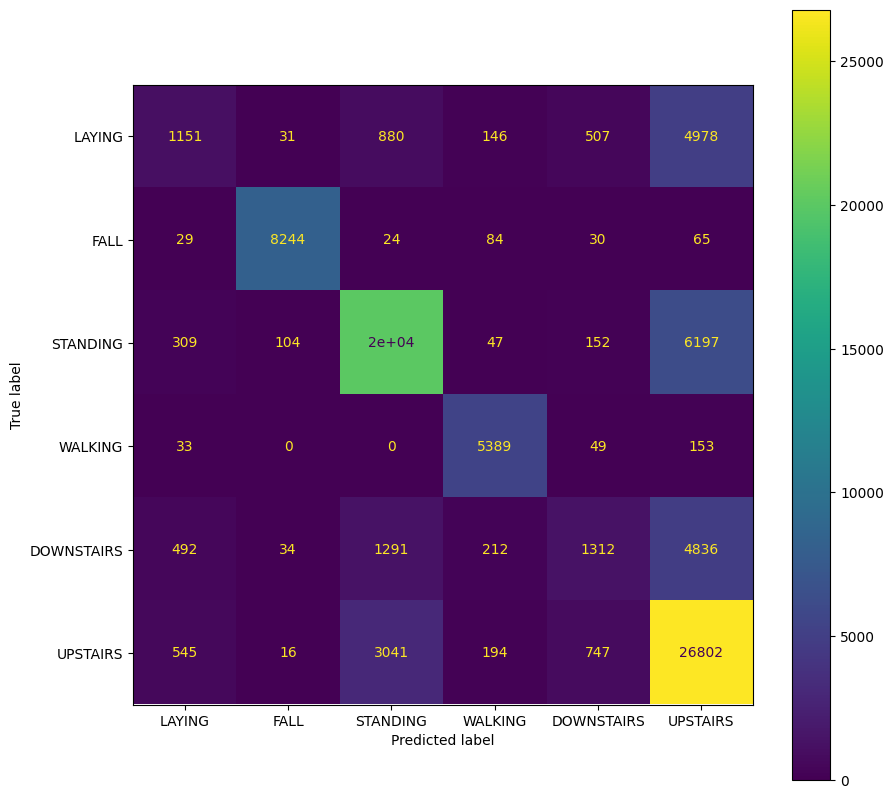

In [23]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)